# Click Once to Run All

In [1]:
# @title Get Video
!wget -P video/ "https://ml-hiring.fringecore.sh/capture_the_scene/video.mp4"

--2025-07-14 15:52:00--  https://ml-hiring.fringecore.sh/capture_the_scene/video.mp4
Resolving ml-hiring.fringecore.sh (ml-hiring.fringecore.sh)... 172.67.182.61, 104.21.75.216, 2606:4700:3031::6815:4bd8, ...
Connecting to ml-hiring.fringecore.sh (ml-hiring.fringecore.sh)|172.67.182.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3700355 (3.5M) [video/mp4]
Saving to: ‘video/video.mp4’

video.mp4           100%[===================>]   3.53M  16.9MB/s    in 0.2s    

2025-07-14 15:52:02 (16.9 MB/s) - ‘video/video.mp4’ saved [3700355/3700355]



## Function to Implement

In [2]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

def process_video_for_pano(video_path):
    # Extract frames
    cap = cv2.VideoCapture(video_path)
    frames = []
    i = 0
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        if i % 10 == 0:
            resized = cv2.resize(frame, (2320, 3000))
            frames.append(resized)
        i += 1
    cap.release()

    print(f"Extracted {len(frames)} frames.")

    # Use OpenCV's stitcher
    stitcher = cv2.Stitcher_create()
    status, pano = stitcher.stitch(frames)

    if status != cv2.Stitcher_OK:
        print("Stitching failed. Status code:", status)
        return None

    # Save and display result
    path_to_pano = "/content/panorama.jpg"
    cv2.imwrite(path_to_pano, pano)

    plt.figure(figsize=(16,9))
    plt.imshow(cv2.cvtColor(pano, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title("Panorama Generated from Video")
    plt.show()

    return path_to_pano


## Eval

Extracted 26 frames.


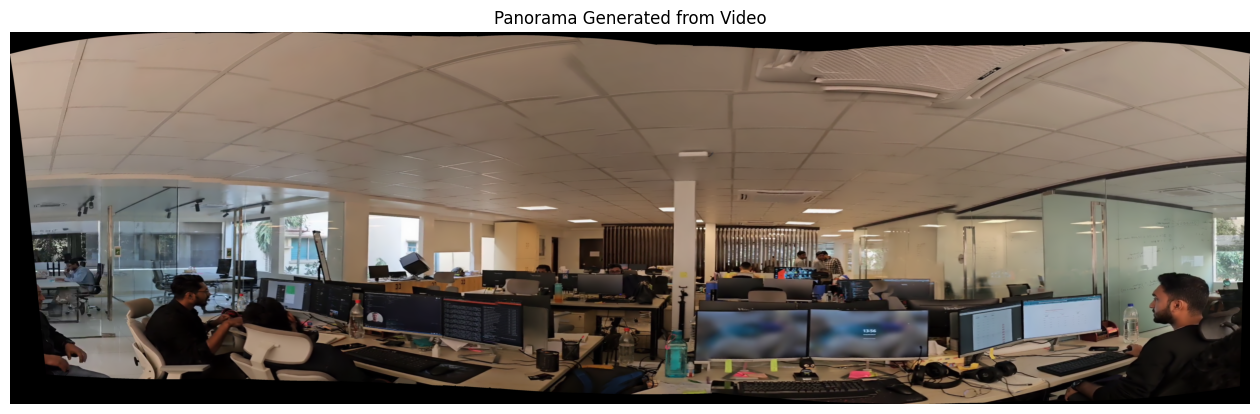

'/content/panorama.jpg'

In [3]:
# @title Get Pano

video_file_path = '/content/video/video.mp4'
process_video_for_pano(video_file_path)


In [4]:
# @title Save the panorama image
from google.colab import files
files.download("/content/panorama.jpg")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>